In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Loading Dataframe and making some adjustments to include date column and duplicate columns

In [2]:
df = pd.read_csv('chronic_kidney_disease.csv')

data = """05/10/2001; 05/10/01; 5/10/09; 6/2/01
May-10-2001; May 10, 2010; March 25, 2001; Mar. 25, 2001; Mar 25 2001;
25 Mar 2001; 25 March 2001; 25 Mar. 2001; 25 March, 2001
Mar 25th, 2001; Mar 25th, 2001; Mar 12nd, 2001
Feb 2001; Sep 2001; Oct 2001
5/2001; 11/2001
2001; 2015 5"""

data = data.replace('\n',';').split(';')
df['Date'] = pd.Series([data[np.random.randint(0,len(data))] for _ in range(df.shape[0])])



df['aged']=df['age']

df.rename(columns = {"aged":"age"},inplace=True)


In [3]:
from dataanalyser.explorer import Explorer


Number of rows:  400 	 Number of columns:  27
Preprocessing....
bp  converted from str to  int
sg  converted from str to  float
al  converted from str to  int
su  converted from str to  int
bgr  converted from str to  int
bu  converted from str to  int
sc  converted from str to  float
sod  converted from str to  int
pot  converted from str to  float
hemo  converted from str to  float
pcv  converted from str to  int
wc  converted from str to  int
rc  converted from str to  float
Date  converted from str to datetime
Number of rows:  400 	 Number of columns:  27

******************************
Column Types
Note: Numeric_variables having less than 10 distinct values are regarded as categoric
{'numeric': ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'], 'categoric': ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'], 'datetime': ['Date'], 'problem_in_detecting_dtype': ['age', 'age']}
		**Basic Information about the dataset**
   

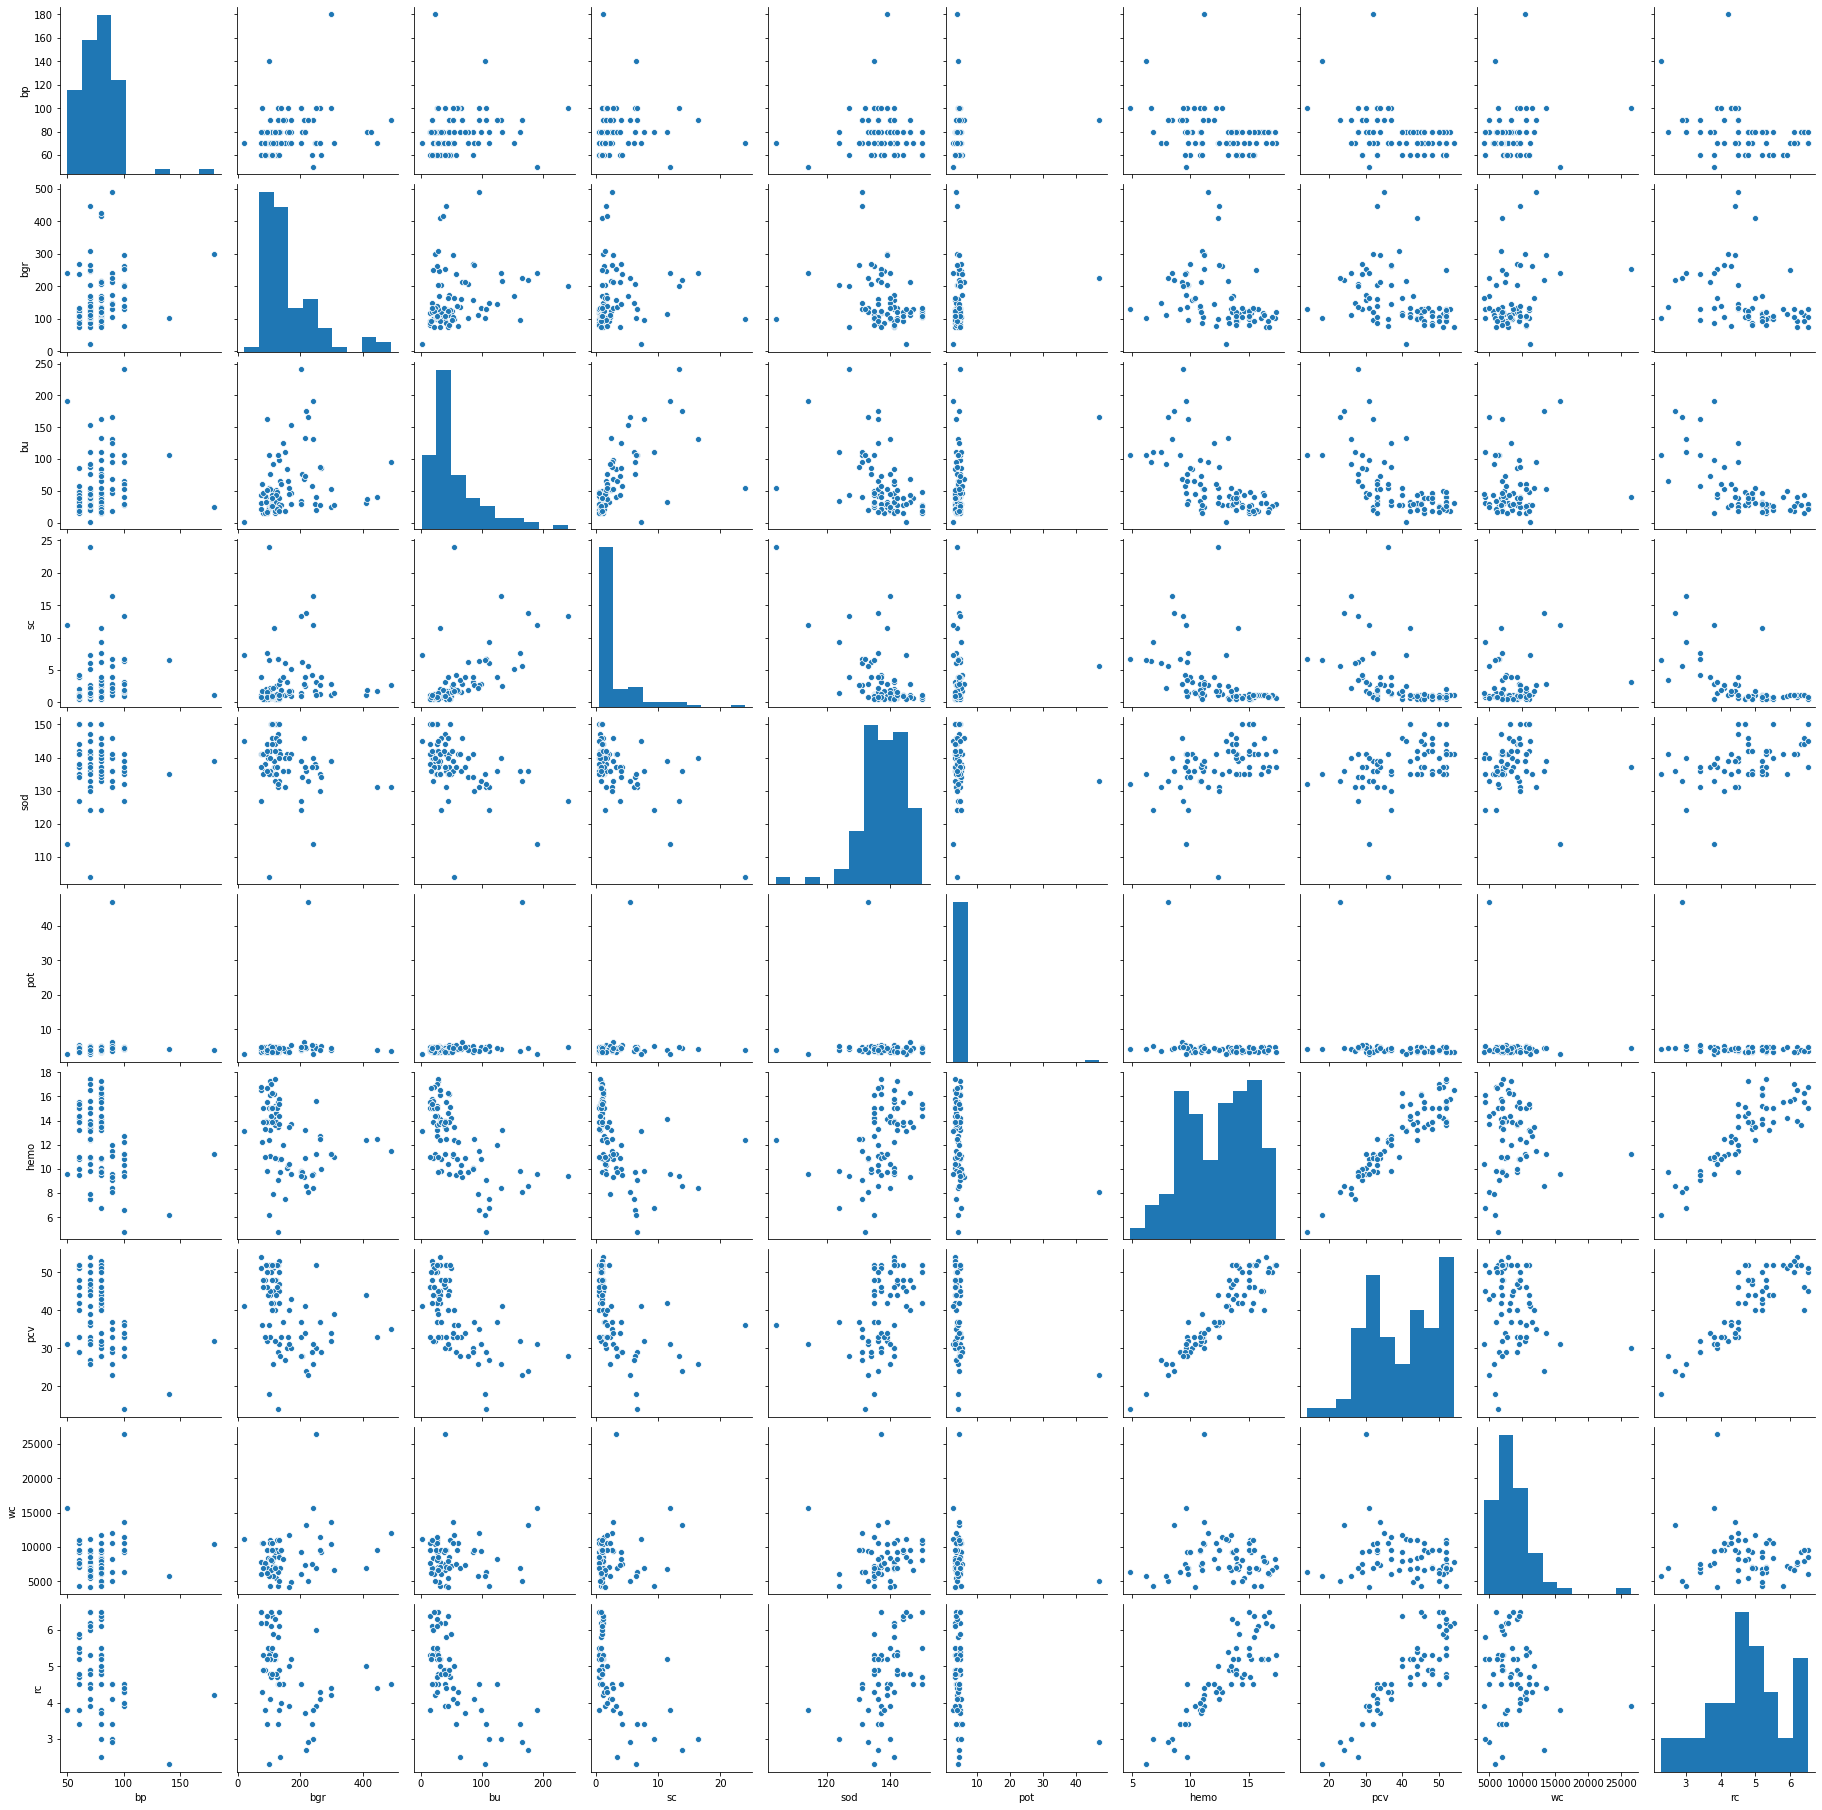

In [4]:
cl = Explorer(df,preprocess=True)

Automating Exploratory Data Analysis
The following steps will be automated
	1. Drop Duplicates, drop rows, drop columns
	2. Outlier Detection
	3. Data Imputation
	4. Statistical Analysis
Default Order: 1 2 3 4 
If you want to change order, then input the numbers in reqd order ex: 3 1 2 4 1.
Note that you can performthe same step again
Order(Enter if no change): 


		**Drop rows, drop columns**

**Dropping rows**
Rows having more than  30.0 %  null values are dropped
Number of rows to be dropped:  22
Drop rows(y or n) c to change percentage: 
Rows removed : 22
Number of rows:  378 	 Number of columns:  26

******************************
**Dropping Columns**
Columns having more than  40.0 %  null values are dropped
[]
Drop columns(y or n) c to change percentage: 
The Dropped Columns are  []
Columns removed : 0
Number of rows:  378 	 Number of columns:  26

******************************

		**Outlier Detection**

**Outlier Detection**
Outliers will be detected for all numeric variables
Me

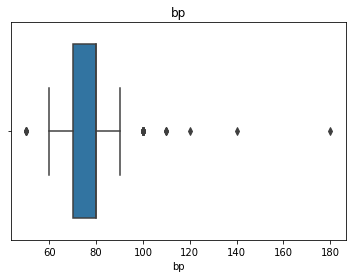

Column:  al  has outliers in  1  rows


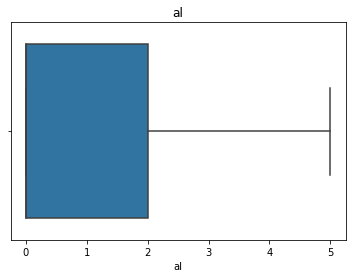

Column:  bgr  has outliers in  32  rows


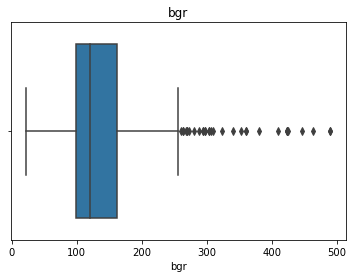

Column:  bu  has outliers in  35  rows


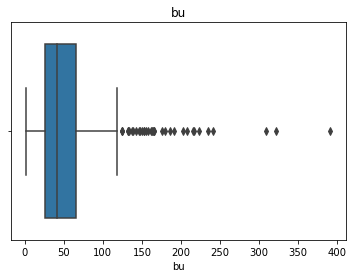

Column:  sc  has outliers in  46  rows


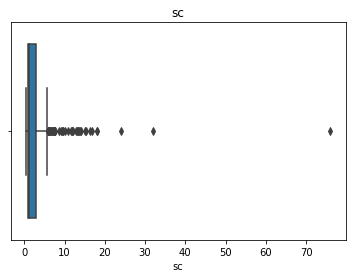

Column:  sod  has outliers in  16  rows


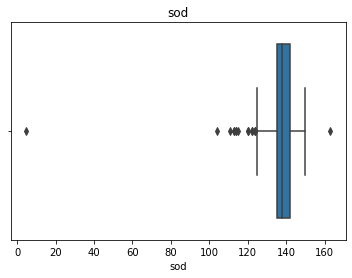

Column:  pot  has outliers in  4  rows


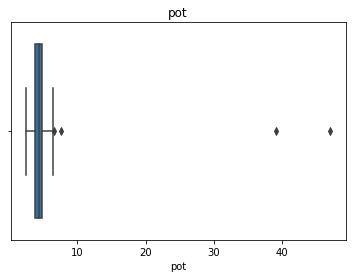

Column:  hemo  has outliers in  1  rows


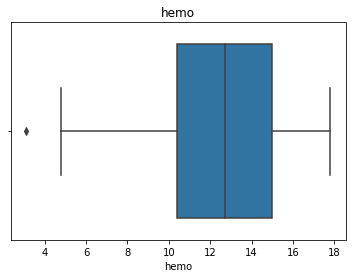

Column:  pcv  has outliers in  1  rows


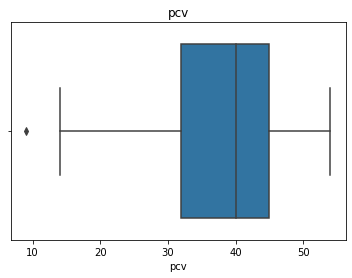

Column:  wc  has outliers in  10  rows


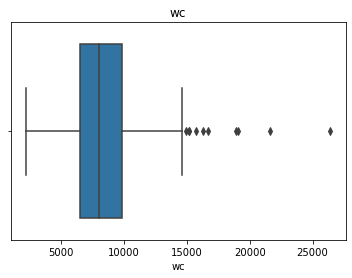

Column:  rc  has outliers in  1  rows


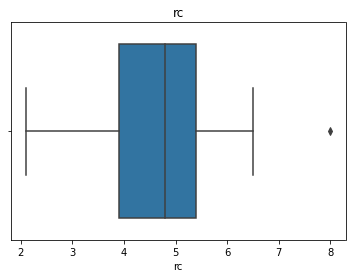

Number of rows:  378 	 Number of columns:  26

******************************

		**Data Imputation**

Null value count(columnwise)
bp        11
sg        32
al        32
su        33
rbc      132
pc        48
pcc        4
ba         4
bgr       35
bu        14
sc        12
sod       71
pot       72
hemo      35
pcv       50
wc        85
rc       109
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
Date      14
age        0
dtype: int64
**Imputing Columns**
All columns having null values will be imputed. To impute specific columns pass columns = [] when calling the method
Columns to be imputed
['bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc' 'sod' 'pot'
 'hemo' 'pcv' 'wc' 'rc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane' 'class' 'Date'
 'age']
Method for imputing numeric variables: median,mean,interpolate
Method for imputing categoric variables: mode,missing(replace nan by "missing")
Other options: bfill,ffill
Impute(y or n c to change method: 

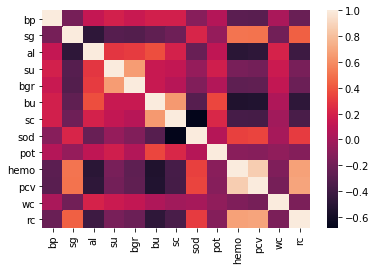

In [5]:
cl.automate()

In [7]:
cl.anova(target='bp')

**Anova Analysis**
Target Variable:  bp
         F-Score       p-value
sg      4.768949  9.191389e-04
al      2.565658  2.675334e-02
su      3.479073  4.370632e-03
rbc          NaN           NaN
pc     10.808964  1.105250e-03
pcc     1.230034  2.681092e-01
ba      4.758086  2.977986e-02
htn    34.029274  1.171591e-08
dm     20.423759  8.323619e-06
cad     2.743308  9.849661e-02
appet  14.320866  1.793194e-04
pe      1.296909  2.555037e-01
ane    16.014172  7.574017e-05
class  39.148164  1.070333e-09
age     0.815444  8.532630e-01


d:\programfiles\python\python3.7.3\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


Plot any two columns. Just give x axis and y axis

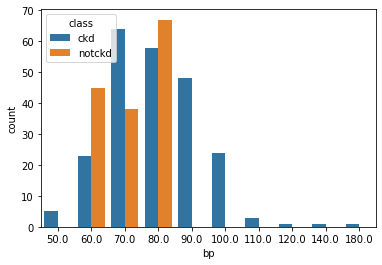

In [8]:
cl.plot(x='bp',y='class')